**Task 2 - Data Analysis and Insights Generation using Python**

# Import Data and Libraries

In [85]:
#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Task_2.csv')
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01/02/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01/03/2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01/04/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01/04/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01/05/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [86]:
#Checking for shape
df.shape

(100, 52)

In [87]:
#Getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VIN                            100 non-null    object 
 1   TRANSACTION_ID                 100 non-null    int64  
 2   CORRECTION_VERBATIM            100 non-null    object 
 3   CUSTOMER_VERBATIM              100 non-null    object 
 4   REPAIR_DATE                    100 non-null    object 
 5   CAUSAL_PART_NM                 95 non-null     object 
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object 
 7   PLATFORM                       100 non-null    object 
 8   BODY_STYLE                     100 non-null    object 
 9   VPPC                           100 non-null    object 
 10  PLANT                          99 non-null     object 
 11  BUILD_COUNTRY                  100 non-null    object 
 12  LAST_KNOWN_DLR_NAME            100 non-null    obje

In [88]:
#Checking for null-values
df.isnull().sum()

,0
VIN,0
TRANSACTION_ID,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
REPAIR_DATE,0
CAUSAL_PART_NM,5
GLOBAL_LABOR_CODE_DESCRIPTION,0
PLATFORM,0
BODY_STYLE,0
VPPC,0


# Column-Wise Analysis:

* Perform a column-wise analysis of the provided dataset.
* Describe each column in terms of its data type, unique values, distribution, and overall significance for stakeholders

In [89]:
#Getting the data type for each column
df.dtypes

,0
VIN,object
TRANSACTION_ID,int64
CORRECTION_VERBATIM,object
CUSTOMER_VERBATIM,object
REPAIR_DATE,object
CAUSAL_PART_NM,object
GLOBAL_LABOR_CODE_DESCRIPTION,object
PLATFORM,object
BODY_STYLE,object
VPPC,object


In [90]:
#Checking for unique values
df.nunique()

,0
VIN,98
TRANSACTION_ID,32
CORRECTION_VERBATIM,93
CUSTOMER_VERBATIM,100
REPAIR_DATE,29
CAUSAL_PART_NM,18
GLOBAL_LABOR_CODE_DESCRIPTION,4
PLATFORM,11
BODY_STYLE,6
VPPC,26


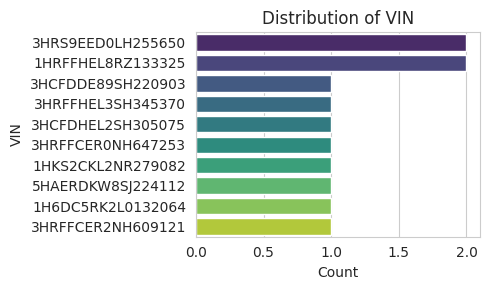

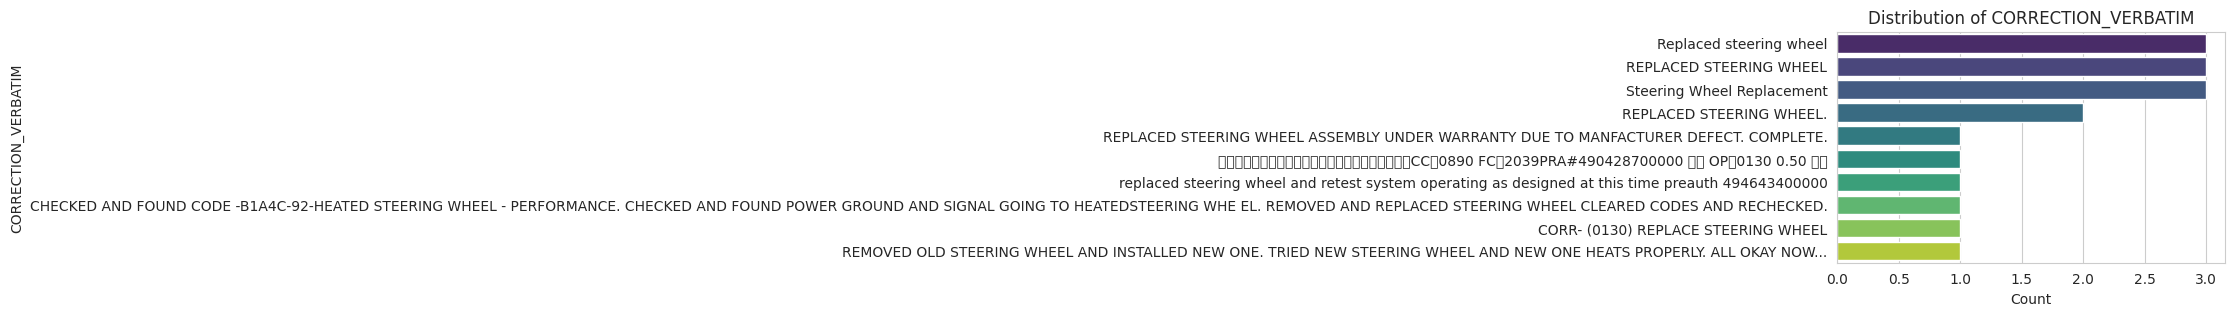

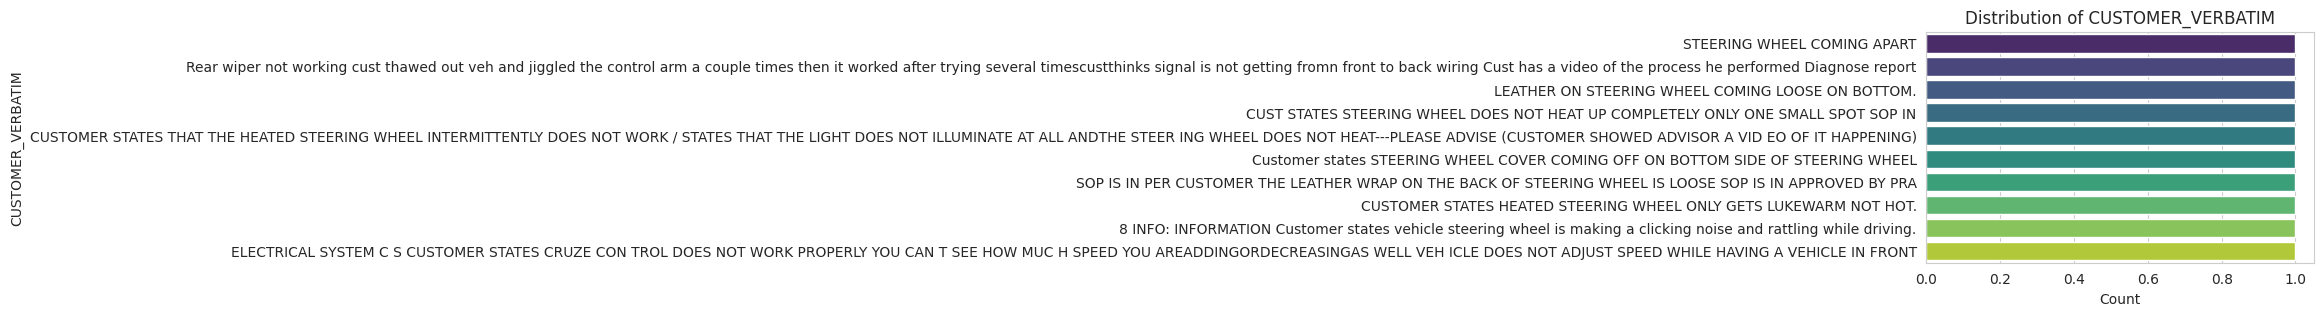

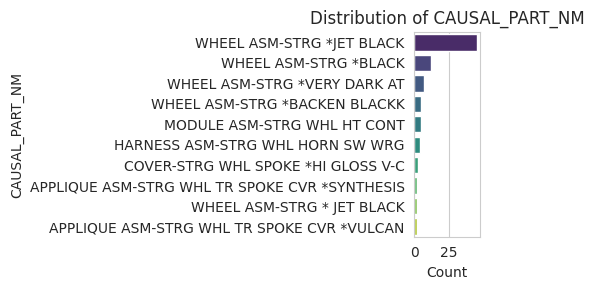

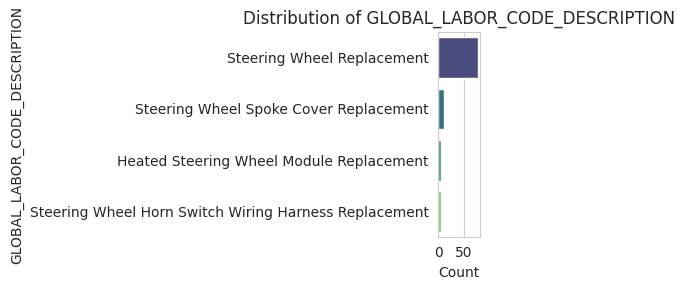

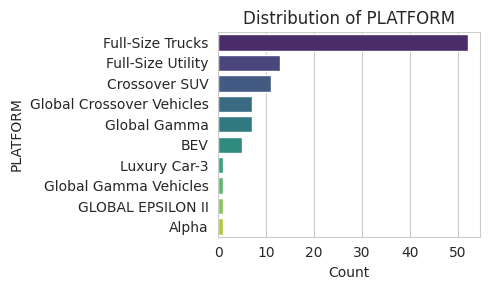

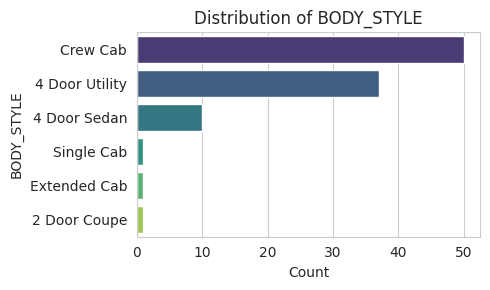

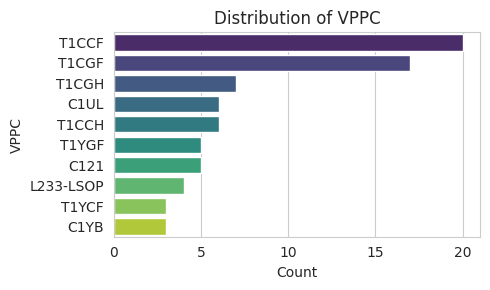

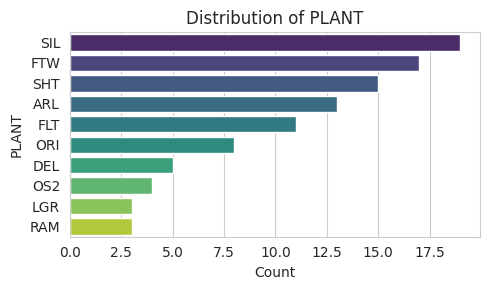

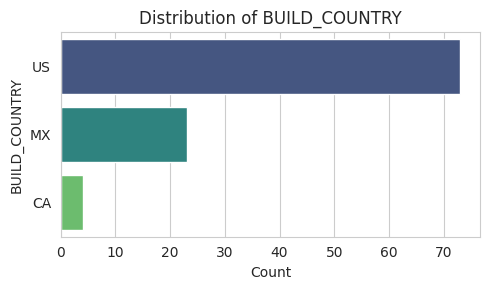

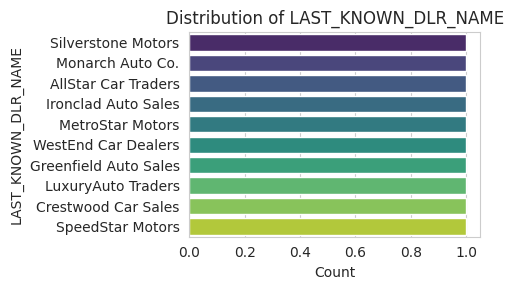

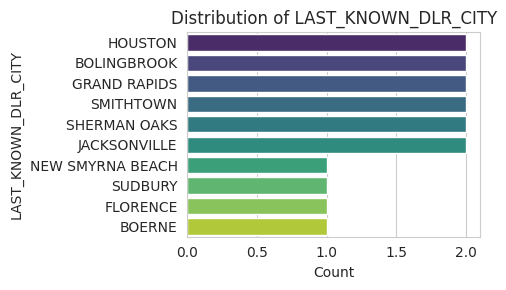

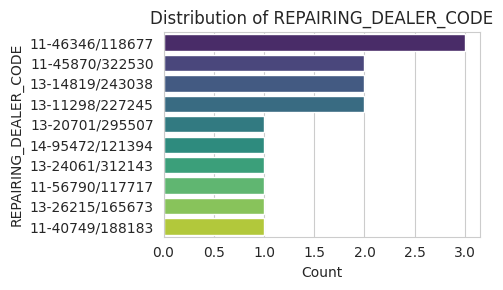

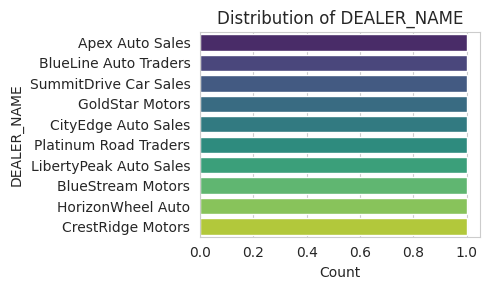

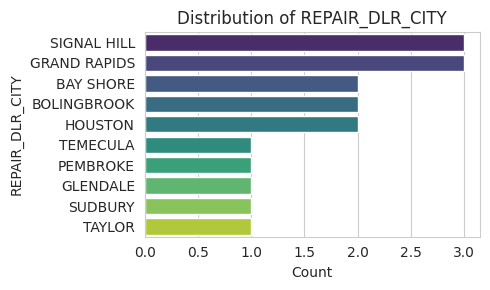

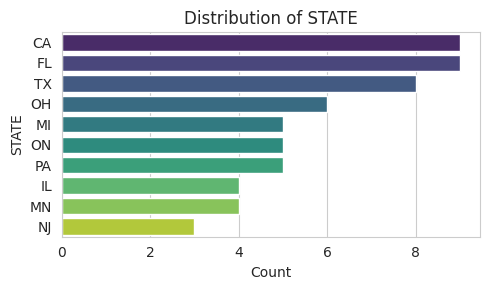

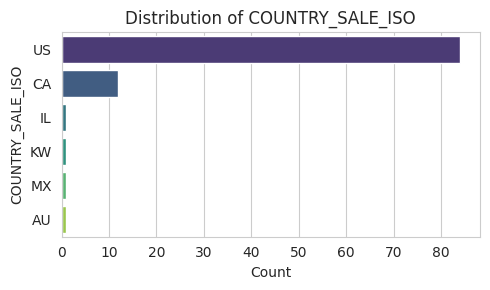

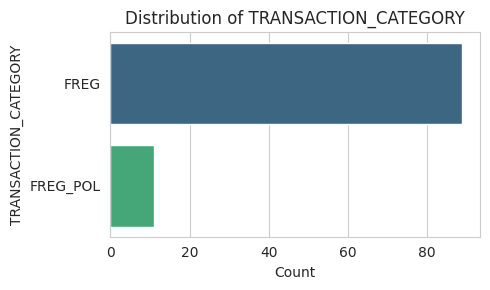

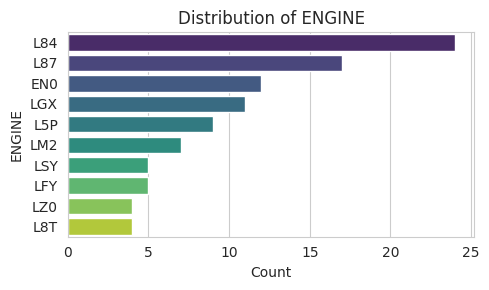

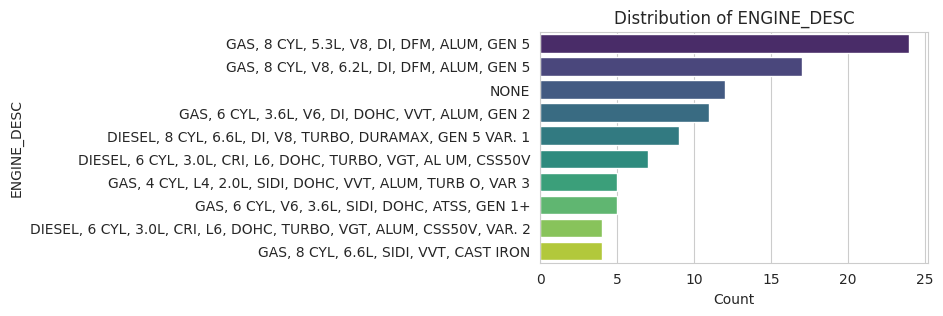

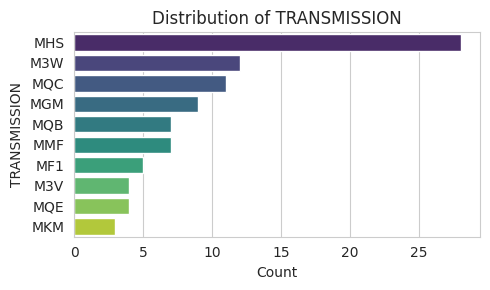

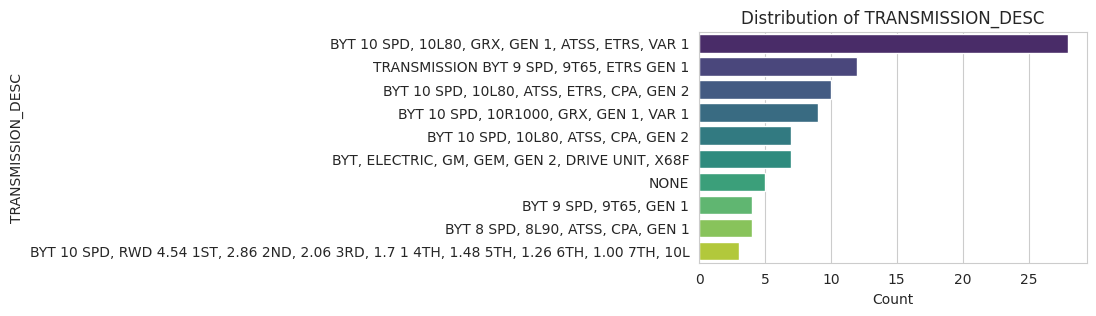

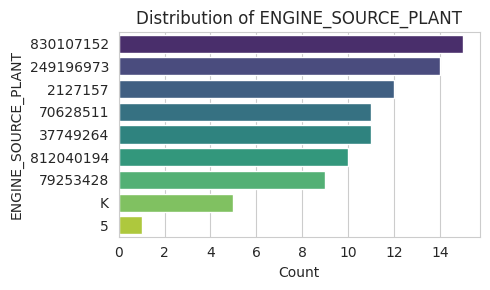

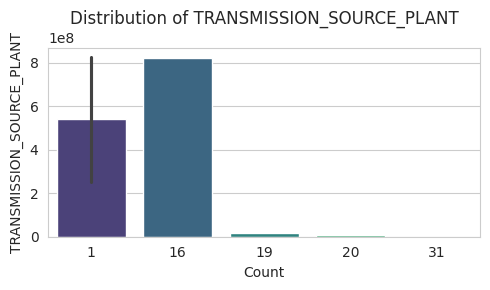

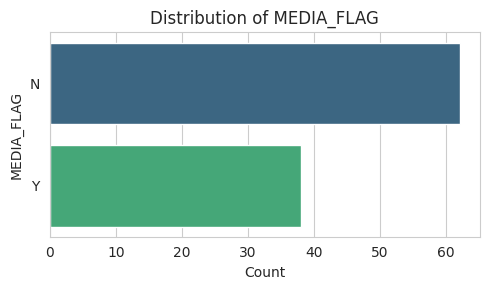

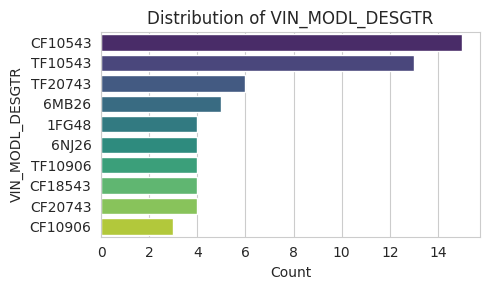

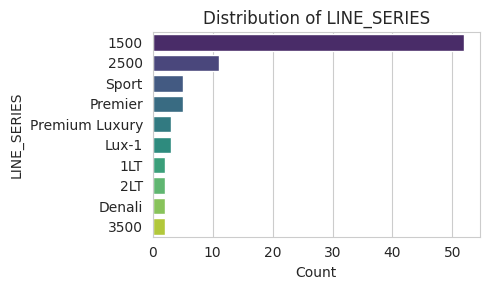

In [91]:
#grouping all the objective columns in object_col
object_col = df[["VIN","CORRECTION_VERBATIM","CUSTOMER_VERBATIM","CAUSAL_PART_NM",
    "GLOBAL_LABOR_CODE_DESCRIPTION",
    "PLATFORM",
    "BODY_STYLE",
    "VPPC",
    "PLANT",
    "BUILD_COUNTRY",
    "LAST_KNOWN_DLR_NAME",
    "LAST_KNOWN_DLR_CITY",
    "REPAIRING_DEALER_CODE",
    "DEALER_NAME",
    "REPAIR_DLR_CITY",
    "STATE",
    "COUNTRY_SALE_ISO",
    "TRANSACTION_CATEGORY",
    "ENGINE",
    "ENGINE_DESC",
    "TRANSMISSION",
    "TRANSMISSION_DESC",
    "ENGINE_SOURCE_PLANT",
    "TRANSMISSION_SOURCE_PLANT",
    "MEDIA_FLAG",
    "VIN_MODL_DESGTR",
    "LINE_SERIES"
]]

#check distribution for object_col using bar chart

for col in object_col:
    plt.figure(figsize=(5, 3))
    value_counts = df[col].value_counts().head(10)  # Show top 10 values for better visualization
    sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

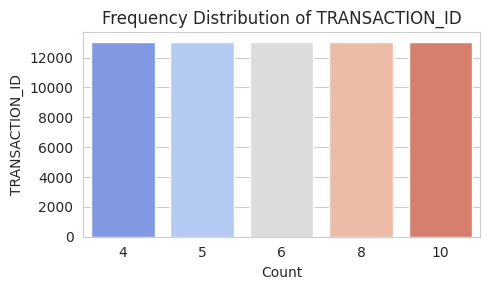

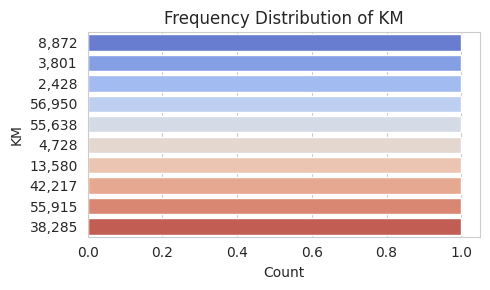

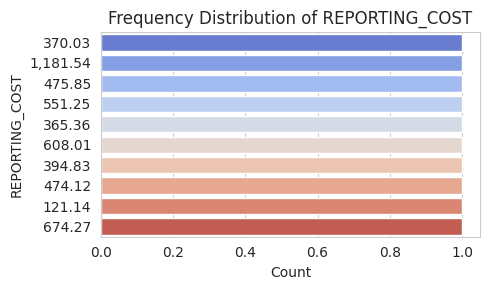

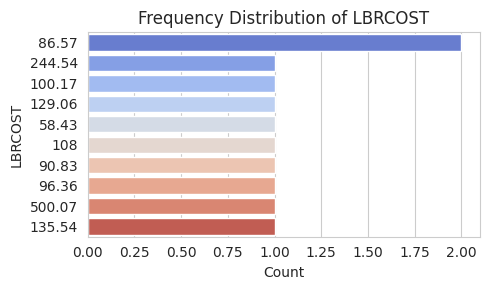

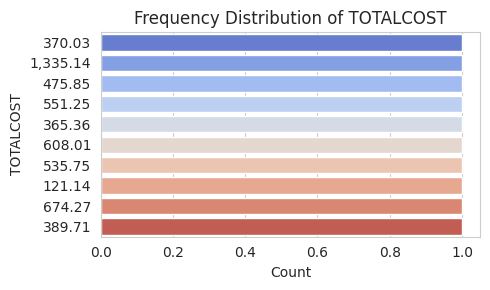

In [92]:
mixed = df[["TRANSACTION_ID","KM","REPORTING_COST","LBRCOST","TOTALCOST"]]

#check distribution using frequency plot
for col in mixed:
    plt.figure(figsize=(5, 3))
    # Compute value counts
    value_counts = df[col].value_counts().head(10)  # Top 10 unique values for readability
    sns.barplot(x=value_counts.values, y=value_counts.index, palette="coolwarm")
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

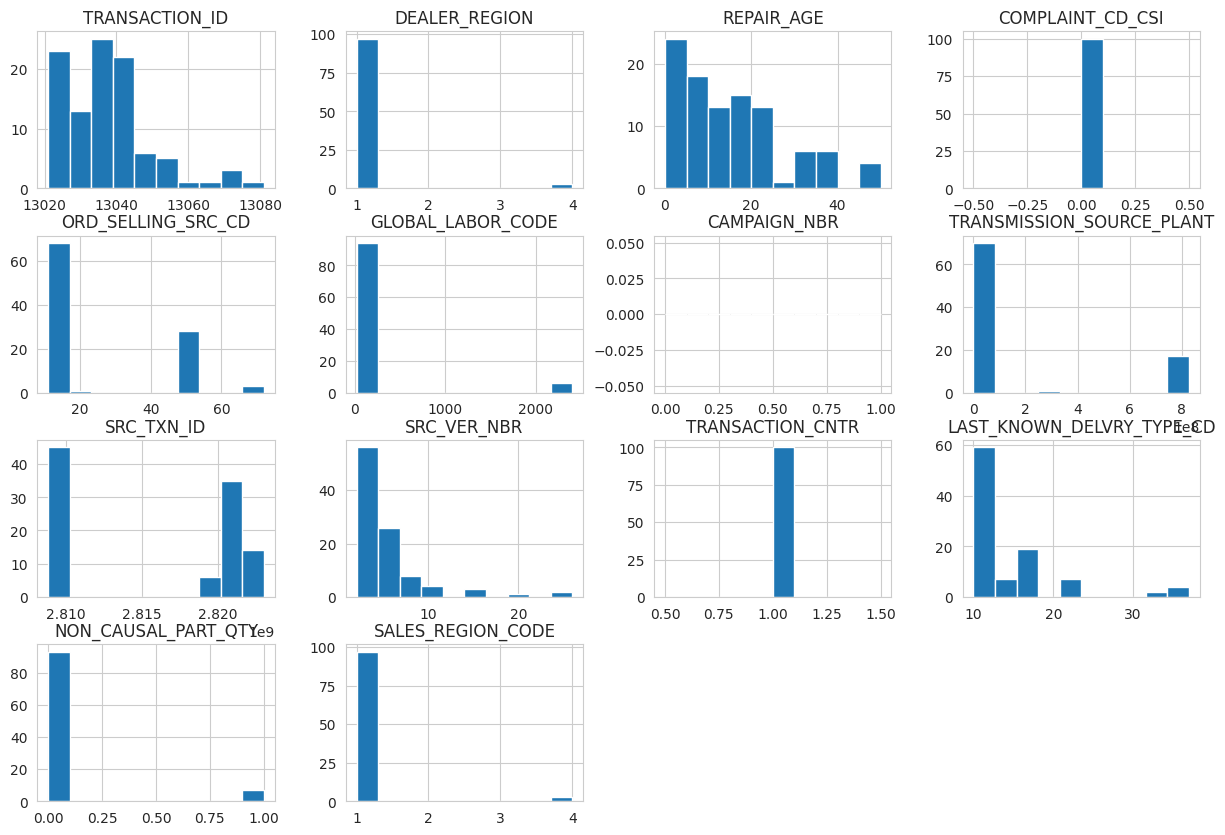

In [93]:
#Checking for distribution using histogram
df.hist(figsize=(15,10))
plt.show()

**Significance for Stakeholders:**
* Dealership: Columns like DEALER_NAME and DEALER_REGION help track dealer performance.
* Cost Analysis: Numerical columns like TOTALCOST and LBRCOST are critical for financial assessments.
* Geographic Trends: Columns like STATE and REPAIR_DLR_CITY allow for regional trend analysis.
* Vehicle Issues: Columns like CAUSAL_PART_NM and COMPLAINT_CD help identify common defects.

# Data Cleaning:
* Handle missing or invalid values using appropriate methods (e.g., imputation, deletion).
* Address inconsistencies in categorical columns (e.g., typos, inconsistent capitalization).
* Ensure numerical columns are in the correct format and free from outliers, where applicable.

In [94]:
#handling the null values

df['CAUSAL_PART_NM'].fillna('Unknown', inplace=True)
df['PLANT'].fillna(df['PLANT'].mode()[0], inplace=True)
df['STATE'].fillna('Unknown', inplace=True)

In [95]:
df['TRANSMISSION_SOURCE_PLANT'].fillna(df['TRANSMISSION_SOURCE_PLANT'].mean(), inplace=True)
df['LAST_KNOWN_DELVRY_TYPE_CD'].fillna(df['LAST_KNOWN_DELVRY_TYPE_CD'].mean(), inplace=True)
df.drop(columns=['CAMPAIGN_NBR'], inplace=True)
df['TOTALCOST'] = pd.to_numeric(df['TOTALCOST'], errors='coerce')
df['TOTALCOST'].fillna(df['TOTALCOST'].median(), inplace=True)
df['REPAIR_DLR_POSTAL_CD'].fillna('Unknown', inplace=True)

In [96]:
# Drop rows where any of the specified columns have null values
df.dropna(subset=['VEH_TEST_GRP', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM'], inplace=True)
df.dropna(subset=['LINE_SERIES','ENGINE_SOURCE_PLANT','ENGINE_TRACE_NBR','TRANSMISSION_TRACE_NBR'], inplace=True)

In [97]:
#pip install fuzzywuzzy python-Levenshtein

In [98]:
from fuzzywuzzy import process, fuzz
import re

def remove_special_characters(text):
    if pd.notnull(text):
        return re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text

# Apply to a column
df['CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].apply(remove_special_characters)
df['CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].apply(remove_special_characters)

Outliers detected in column 'TRANSACTION_ID': 4
                  VIN  TRANSACTION_ID  \
6   1HRFFHEL4RZ149960           13071   
9   1HRFFHEL8RZ133325           13074   
24  1HKS2JKR2NR336997           13073   
88  3HCFDDED5NH572905           13065   

                                  CORRECTION_VERBATIM  \
6   ACCESSED REMOVED AND REPLACED THE DRIVERS ASSI...   
9                          Steering Wheel Replacement   
24  replaced steering wheel no further action requ...   
88  AUTORIZACIN ACEPTADA VOLANTE REEMPLAZADO PARA ...   

                                    CUSTOMER_VERBATIM REPAIR_DATE  \
6   CUST STATES DRIVERS ASSIST LIGHT COMES ON DASH...  01/05/2024   
9   Customer states that they are getting a messag...  01/09/2024   
24  CUSTOMER STATES STEERING WHEELS STICHING COMIN...  01/12/2024   
88  CS STEERING WHEEL LEATHER IS COMING UNDONE AT ...  02/05/2024   

                  CAUSAL_PART_NM GLOBAL_LABOR_CODE_DESCRIPTION  \
6      WHEEL ASM-STRG *JET BLACK    Steering Whe

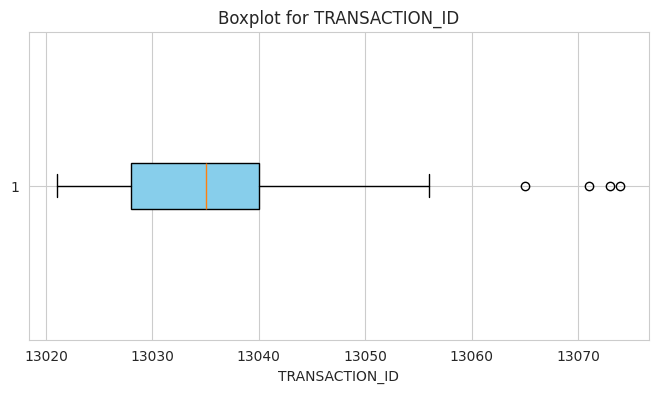

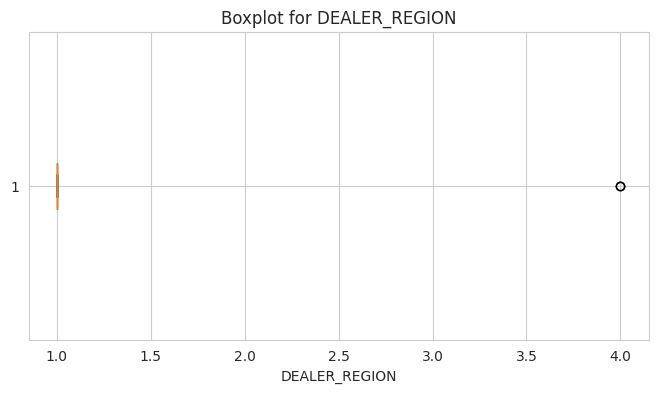

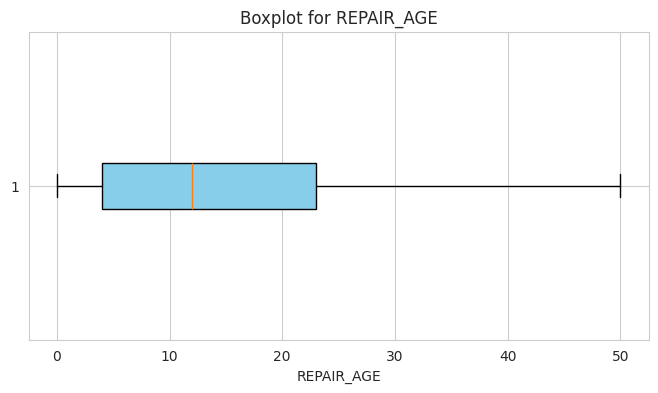

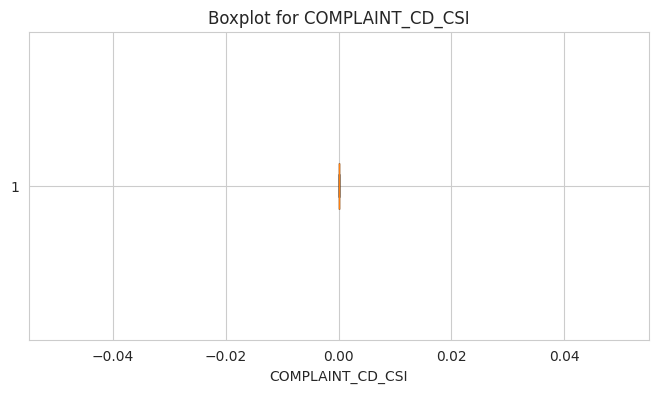

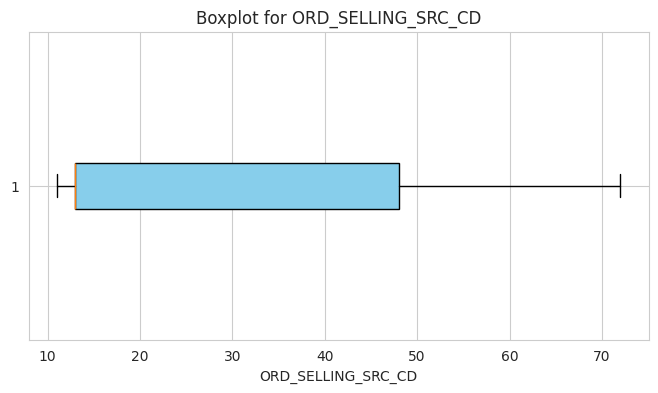

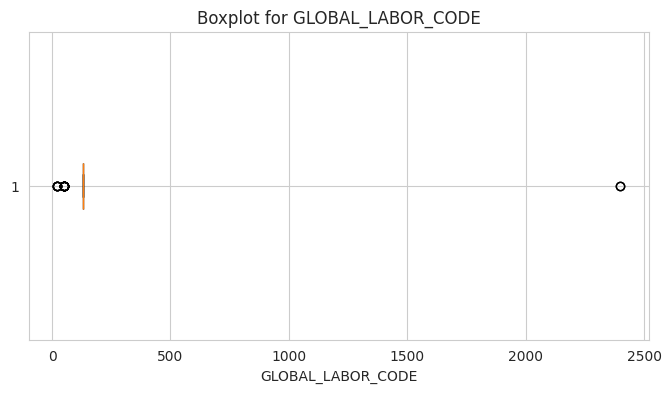

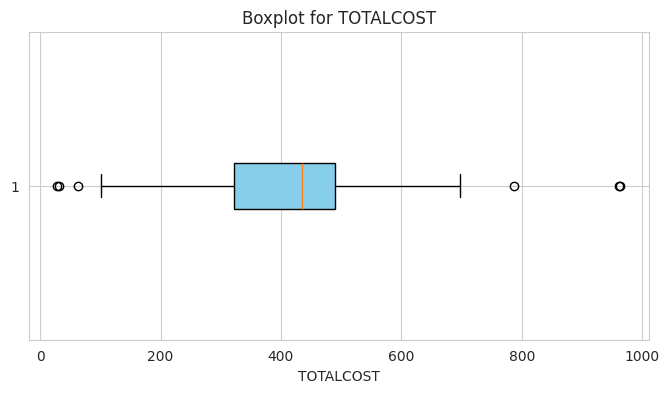

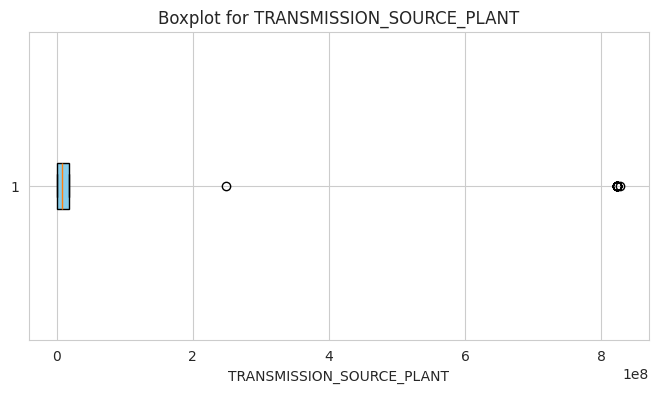

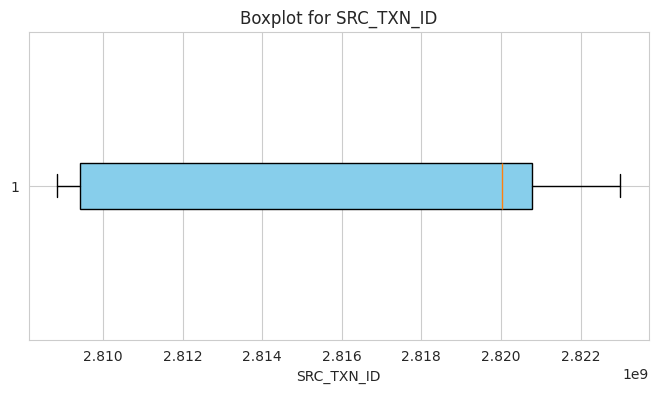

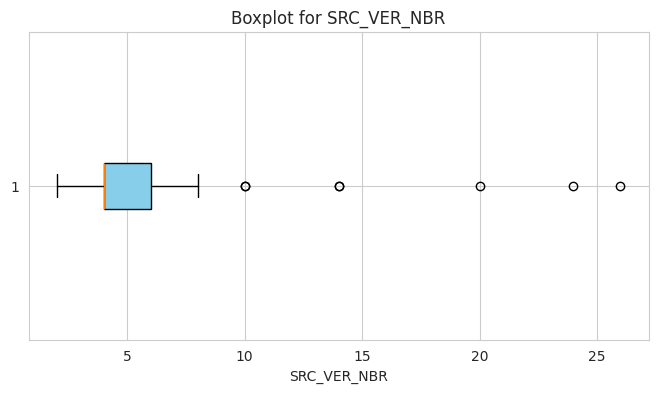

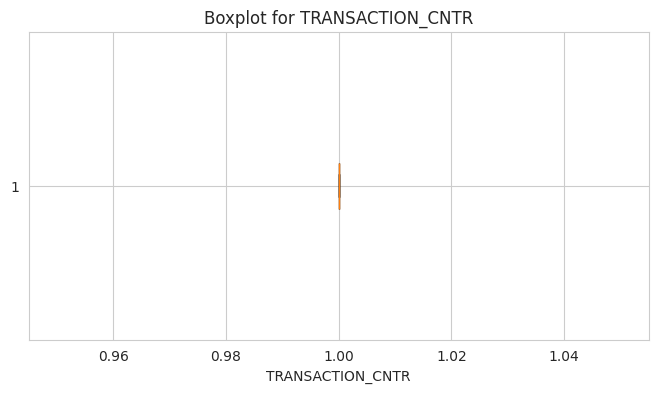

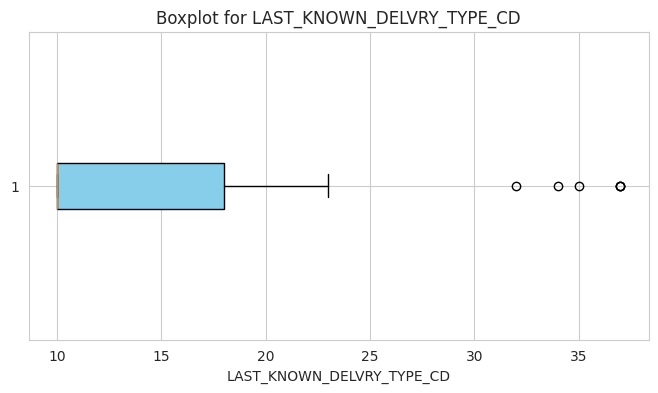

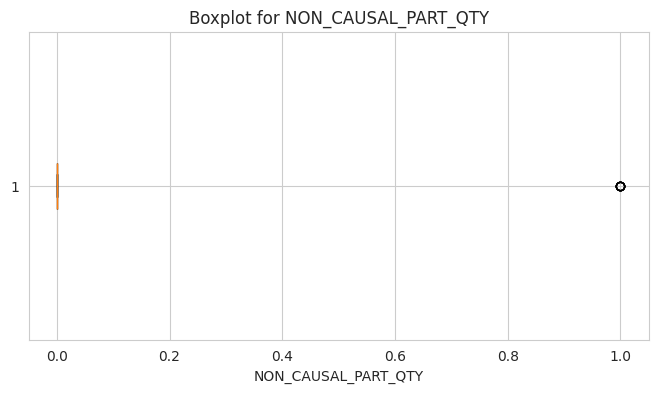

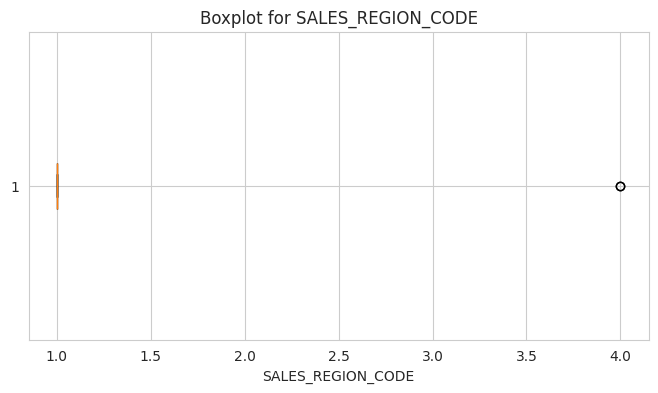

In [99]:
#Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Check for outliers in each numerical column
outlier_info = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_info[col] = outliers.index.tolist()  # Store indices of outliers
    print(f"Outliers detected in column '{col}': {len(outliers)}")
    if not outliers.empty:
        print(outliers)

#Visualize outliers using boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

# Identifying Critical Columns:
* Select the top 5 critical columns that might be most insightful for stakeholders according to your data understanding.
* Provide reasoning for your selection.
* Generate visualizations (e.g., bar plots etc) using Python to represent these insights effectively. (atleast 3)

1. TRANSACTION_ID:

* Uniquely identifies each transaction and it can helps in tracking individual entries.
* Useful for linking to other records.

2. REPAIR_DATE:

* Provides the timeline of events and repair activities, which is critical for analyzing trends, delays.
* Helps stakeholders in evaluating service efficiency and identifying peak repair periods.

3. KM:

* Represents the vehicle usage and mileage at the time of repair.
* Key for determining patterns in wear and tear, warranty claims.

4. TOTALCOST:

* Indicates the total cost associated with the repair/service.
* Essential for financial analysis, cost optimization, and identifying high-cost repairs that might require further investigation.

5. COMPLAINT_CD_CSI:

* Encodes the type or severity of customer complaints (CSI - Customer Satisfaction Index).
* Critical for customer satisfaction analysis, improving service quality, and prioritizing common complaints.

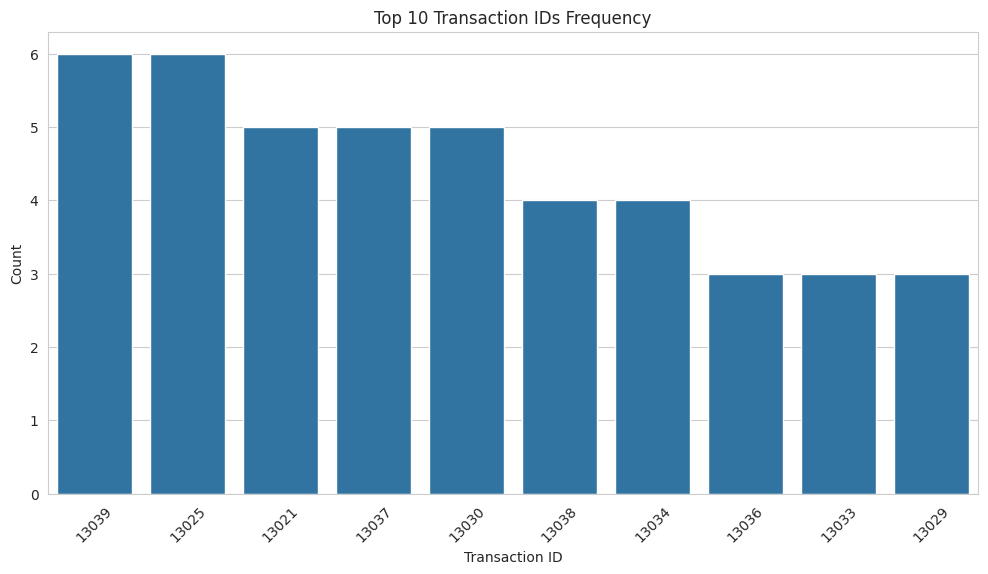

In [100]:
sns.set_style("whitegrid")

#Transaction ID Count (Bar Plot)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TRANSACTION_ID', order=df['TRANSACTION_ID'].value_counts().index[:10])
plt.title('Top 10 Transaction IDs Frequency')
plt.xlabel('Transaction ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

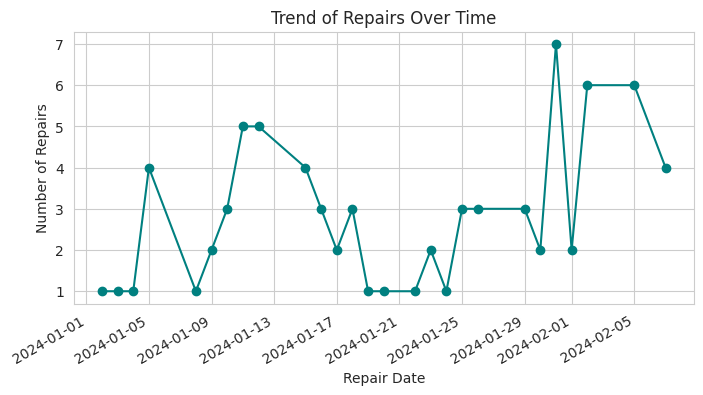

In [101]:
#Repair_Date Trend (Line Plot)
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])  # Ensure REPAIR_DATE is in datetime format
repair_date_trend = df['REPAIR_DATE'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
repair_date_trend.plot(kind='line', marker='o', color='teal')
plt.title('Trend of Repairs Over Time')
plt.xlabel('Repair Date')
plt.ylabel('Number of Repairs')
plt.grid(True)
plt.show()

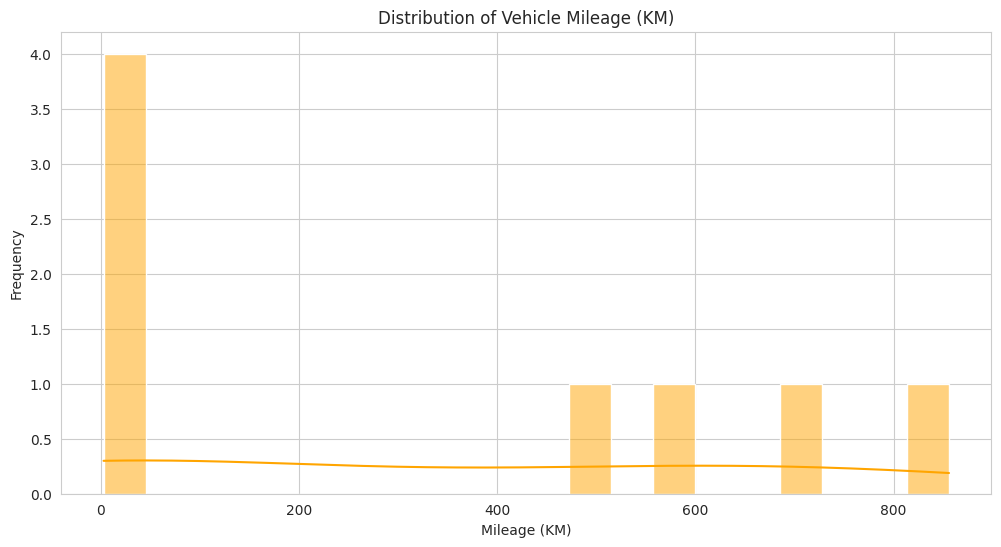

In [102]:
#Mileage (KM) Distribution (Histogram)
plt.figure(figsize=(12, 6))
df['KM'] = pd.to_numeric(df['KM'], errors='coerce')  # Convert KM to numeric
sns.histplot(df['KM'], bins=20, kde=True, color='orange')
plt.title('Distribution of Vehicle Mileage (KM)')
plt.xlabel('Mileage (KM)')
plt.ylabel('Frequency')
plt.show()

# Generating tags/features from free text available :
* Generate meaningful tags from the free text fields to summarize information, example - failure conditions and components etc etc..

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


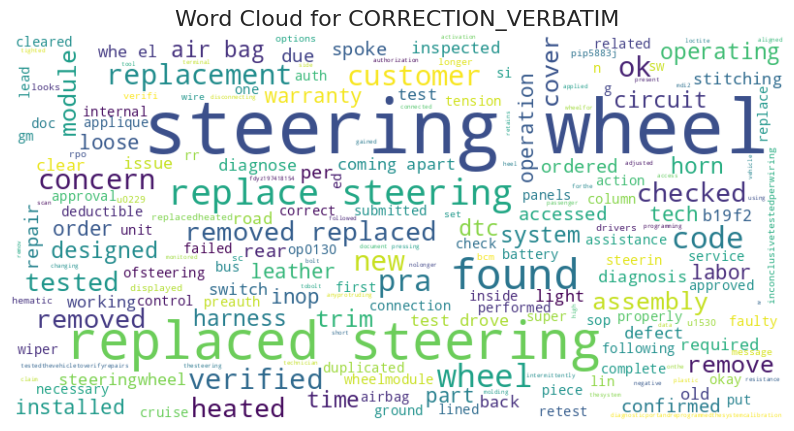

In [105]:
# Download stopwords
nltk.download('stopwords')

# Text Preprocessing Function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    text = text.lower().translate(translator)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

#Preprocess the "CORRECTION_VERBATIM" column
df['PROCESSED_CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].apply(preprocess_text)

#Combine all processed text
all_text = ' '.join(df['PROCESSED_CORRECTION_VERBATIM'])

#Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

#Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for CORRECTION_VERBATIM", fontsize=16)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


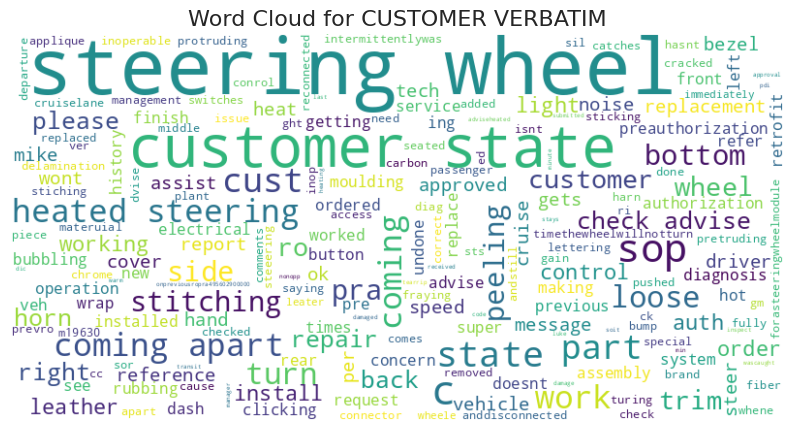

In [107]:
# Download stopwords
nltk.download('stopwords')

# Text Preprocessing Function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    text = text.lower().translate(translator)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

#Preprocess the "CUSTOMER_VERBATIM" column
df['PROCESSED_CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].apply(preprocess_text)

#Combine all processed text
all_text = ' '.join(df['PROCESSED_CUSTOMER_VERBATIM'])

#Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

#Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for CUSTOMER VERBATIM", fontsize=16)
plt.show()

# Summary and Insights (Food for thought and has bonus marks)
* Write a summary of the tags generated, including potential insights derived from the dataset.
* Provide actionable recommendations for stakeholders based on your analysis.
* Highlight discrepancies in the dataset (e.g., null values, missing primary keys) and how did you approach.

1. **Steering Wheel**
* Problems with steering functionality could indicate manufacturing defects or wear-and-tear issues.
* Safety concerns are likely a priority for stakeholders, as steering issues directly affect vehicle control.

2. **Customer State**
* This could provide geographical insights into regional trends or conditions (e.g., climate, road conditions) affecting vehicle performance.
* Identifying hotspots of complaints can help prioritize customer support and technical improvements.

3. **Heated Steering**
* This highlights a need to review the design or durability of heating components, especially in colder climates.
* Focused marketing or warranty coverage might mitigate customer dissatisfaction in this area.

4. **Replaced Steering**
* This may indicate a systemic issue with certain vehicle models requiring component replacement.
* Analysis of replacement trends can help reduce costs and improve product quality by addressing root causes.

**Product Improvement:**

* Focus on enhancing the reliability of the steering mechanism and associated features.
* Conduct a root cause analysis to address the need for frequent replacements.

**Customer Support:**

* Prioritize addressing customer concerns in regions with a high density of complaints (identified via "customer state").
* Develop specialized support for heated steering issues in colder climates.

**Quality Assurance:**

* Strengthen quality checks on critical components like steering wheels and heating elements during manufacturing.
* Monitor failure rates across different production batches for early detection of systemic issues.

**Marketing and Communication:**

* Emphasize improvements in the reliability of steering systems in future product releases.
* Offer extended warranties or discounts for frequently reported issues to enhance customer trust.

The dataset, while relatively small with only 100 rows, contained 52 columns, which introduced complexities in identifying and handling discrepancies due to its high dimensionality.

**Null Values:**

* Certain columns, such as PLANT, STATE, and REPAIR_DLR_POSTAL_CD, contained a few null values.
* Columns with a significant number of missing values (e.g., CAMPAIGN_NBR, which had no data at all) were noted.

Although the dataset was small in terms of rows, the high number of columns required a systematic approach to handle discrepancies effectively. By balancing imputation, column reduction, and prioritization, I was able to ensure the dataset was clean and prepared for meaningful analysis without unnecessary loss of information.